# Branch and bound

Method to solve non-convex problems globally (and slowly).

In [7]:
import numpy as np

cost = np.random.uniform(5,10,size=(5,5))
cost.shape

(5, 5)

# First step of branch and bound is defining lower/upper bound functions

In [ ]:
def upper_bound():
    pass

def lower_bound():
    pass 


    

In [53]:
import cvxpy as cp 

def card(x):
    return len(x[x > 0])

def bounding_box_on_problem():
    # solve 2n lps 
    L = np.zeros(n)
    U = np.zeros(n)
    for i in range(n):
        x = cp.Variable(n)
        objective = cp.Minimize(x[i])
        constraints = [A @ x <= b]
        problem = cp.Problem(objective, constraints)
        problem.solve()
        L[i] = x.value[i]
        
        x = cp.Variable(n)
        obj = cp.Maximize(x[i])
        constraints = [A @ x <= b]
        problem = cp.Problem(objective, constraints)
        problem.solve()
        if x.value == None:
            U[i] = np.inf
        else:
            U[i] = x.value[i]
        
    return L,U

def relaxed_boolean_lp(L, U):
    z = cp.Variable(n)
    x = cp.Variable(n)
    objective = cp.Minimize(np.ones(n).T @ z)
    contraints = [
        A @ x <= b,
        0 <= z,
        z <= 1
    ]
    for i in range(n):
        contraints.append(L[i] * z[i] <= x[i])
        contraints.append(x[i] <= U[i] * z[i])
    problem = cp.Problem(objective, contraints)
    problem.solve()
    return x.value, z.value
    
        

# Initalise the problem
m = 100
n = 30
A = np.random.normal(0,1,size=(m,n))
b = np.random.uniform(0,1,size=(m))

# Solve for the bounding box on x
L, U = bounding_box_on_problem()


# Solve the relaxation of the boolean LP
x, z = relaxed_boolean_lp(L, U)

upper_bound = card(x)
lower_bound = np.ones(n).T @ z
assert(upper_bound >= lower_bound)

SolverError: Solver 'ECOS' failed. Try another solver, or solve with verbose=True for more information.

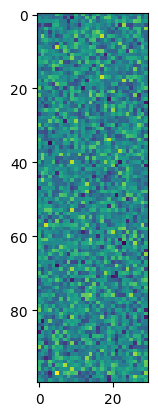

In [56]:
import matplotlib.pyplot as plt
plt.imshow(A)